
**Análisis RFM**: Recencia, Frecuencia y Valor Monetario
El análisis RFM es una técnica de segmentación de clientes utilizada en marketing y gestión de relaciones con clientes (CRM). Se basa en tres dimensiones clave del comportamiento del cliente:

**Recencia (Recency)**: Mide la antigüedad de la última compra de un cliente. Se refiere a cuán reciente fue la última interacción o transacción de un cliente con la empresa.

**Frecuencia (Frequency)**: Mide con qué frecuencia un cliente realiza compras o interacciones con la empresa en un período de tiempo específico. Se refiere a la cantidad de transacciones que un cliente ha realizado en un período determinado.

**Valor Monetario (Monetary Value)**: Mide el valor total de las compras realizadas por un cliente en un período de tiempo específico. Se refiere al monto total que un cliente ha gastado en transacciones con la empresa.

El análisis RFM clasifica a los clientes en grupos o segmentos basados en estos tres criterios, lo que permite identificar y segmentar a los clientes en función de su comportamiento de compra y su valor para la empresa.

**¿Para qué sirve el análisis RFM?**
El análisis RFM permite a las empresas comprender mejor el comportamiento y el valor de sus clientes, lo que a su vez les ayuda a tomar decisiones informadas sobre estrategias de marketing, segmentación de clientes, retención de clientes y personalización de experiencias de cliente.

**Desarrollo del Proyecto**
En este proyecto de análisis RFM utilizando Python, se utilizará un conjunto de datos que contiene información sobre transacciones de clientes. Se aplicará el análisis RFM para calcular y segmentar a los clientes en base a su Recencia, Frecuencia y Valor Monetario. Luego, se realizarán visualizaciones y análisis adicionales para comprender mejor el comportamiento y el valor de los clientes, así como para identificar oportunidades de negocio y estrategias de marketing.

In [1]:
#
#  CArga de Librerias
#
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.tools import FigureFactory as ff
from plotly.offline import iplot

CONFIGURACION DE AMBIENTES
PALETA COLORES
WARNINGS

In [2]:
# Configuración de estilo y paleta de colores
sns.set_style('whitegrid')
palette = 'Set2'

# Ignorar las advertencias
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Data.csv')
data

,IDCliente,NombreCompleto,FechaCompra,PaisTerritorioVenta,RegionTerritorioVenta,NombreProducto,NombreSubcategoriaProducto,NombreCategoriaProducto,MontoVenta
0,11012,Lauren Walker,2013-03-16,United States,Northwest,Cubierta de montaña GA,Cubierta y cámara,Accesorio,35.00
1,11012,Lauren Walker,2013-03-16,United States,Northwest,Cubierta para cámara de montaña,Cubierta y cámara,Accesorio,4.99
2,11012,Lauren Walker,2013-03-16,United States,Northwest,"Casco deportivo: 100, negro",Casco,Accesorio,34.99
3,11012,Lauren Walker,2013-10-15,United States,Northwest,Cubierta para cámara de carretera,Cubierta y cámara,Accesorio,3.99
4,11013,Ian Jenkins,2013-04-13,United States,Northwest,Cubierta para cámara de carretera,Cubierta y cámara,Accesorio,3.99
...,...,...,...,...,...,...,...,...,...
9995,22153,Alyssa Kelly,2013-05-28,United States,Southwest,Portabotellas de carretera,Portabotellas y botella,Accesorio,8.99
9996,22157,Maria Richardson,2013-10-08,United States,Northwest,Cubierta de montaña GM,Cubierta y cámara,Accesorio,29.99
9997,22158,Amber Phillips,2013-06-06,United States,Northwest,Cubierta de montaña GM,Cubierta y cámara,Accesorio,29.99
9998,22158,Amber Phillips,2013-06-06,United States,Northwest,Cubierta para cámara de montaña,Cubierta y cámara,Accesorio,4.99


ESTADISTICA DESCRIPTIVA :

In [4]:
# Función para verificar el dataframe
def check_df(dataframe, head=5):
    """
    Función para verificar el dataframe:
    - Muestra la forma, tipos de datos, valores perdidos y duplicados del dataframe.
    """
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(70,'-'))
    print(dataframe.describe().T)

check_df(data)

------------------------------- SHAPE --------------------------------
Rows: 10000
Columns: 9
------------------------------- TYPES --------------------------------
IDCliente                       int64
NombreCompleto                 object
FechaCompra                    object
PaisTerritorioVenta            object
RegionTerritorioVenta          object
NombreProducto                 object
NombreSubcategoriaProducto     object
NombreCategoriaProducto        object
MontoVenta                    float64
dtype: object
--------------------------- MISSING VALUES ---------------------------
IDCliente                     0
NombreCompleto                0
FechaCompra                   0
PaisTerritorioVenta           0
RegionTerritorioVenta         0
NombreProducto                0
NombreSubcategoriaProducto    0
NombreCategoriaProducto       0
MontoVenta                    0
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
0
------------------------------ DES

In [5]:
data

,IDCliente,NombreCompleto,FechaCompra,PaisTerritorioVenta,RegionTerritorioVenta,NombreProducto,NombreSubcategoriaProducto,NombreCategoriaProducto,MontoVenta
0,11012,Lauren Walker,2013-03-16,United States,Northwest,Cubierta de montaña GA,Cubierta y cámara,Accesorio,35.00
1,11012,Lauren Walker,2013-03-16,United States,Northwest,Cubierta para cámara de montaña,Cubierta y cámara,Accesorio,4.99
2,11012,Lauren Walker,2013-03-16,United States,Northwest,"Casco deportivo: 100, negro",Casco,Accesorio,34.99
3,11012,Lauren Walker,2013-10-15,United States,Northwest,Cubierta para cámara de carretera,Cubierta y cámara,Accesorio,3.99
4,11013,Ian Jenkins,2013-04-13,United States,Northwest,Cubierta para cámara de carretera,Cubierta y cámara,Accesorio,3.99
...,...,...,...,...,...,...,...,...,...
9995,22153,Alyssa Kelly,2013-05-28,United States,Southwest,Portabotellas de carretera,Portabotellas y botella,Accesorio,8.99
9996,22157,Maria Richardson,2013-10-08,United States,Northwest,Cubierta de montaña GM,Cubierta y cámara,Accesorio,29.99
9997,22158,Amber Phillips,2013-06-06,United States,Northwest,Cubierta de montaña GM,Cubierta y cámara,Accesorio,29.99
9998,22158,Amber Phillips,2013-06-06,United States,Northwest,Cubierta para cámara de montaña,Cubierta y cámara,Accesorio,4.99


DATOS DE APOYO A LA SEGMENTACION

In [6]:

data['FechaCompra'] = pd.to_datetime(data['FechaCompra'])




GRAFICOS DE LINEAS
POR MES
POR SEMANA
CANTIDAD COMPRAS
MONTO VENTAS

In [7]:

#
#    RESAMPLE PARA VENTAS POR SEMANA
#
Ventas_por_semana = data.resample('w', on='FechaCompra').size()
fig = px.line(data, x=Ventas_por_semana.index, y=Ventas_por_semana,
              labels={'y': 'Número de Ventas', 'x': 'Fecha'})
fig.update_layout(title_text='Número de Ventas Semanal', title_x=0.5, title_font=dict(size=18))
fig.show()

#
#    RESAMPLE PARA VENTAS POR MES
#
Ventas_por_mes    = data.resample('M', on='FechaCompra').size()
fig = px.line(data, x=Ventas_por_mes.index, y=Ventas_por_mes,
              labels={'y': 'Número de Ventas', 'x': 'Fecha'})
fig.update_layout(title_text='Número de Ventas Mensual', title_x=0.5, title_font=dict(size=18))
fig.show()


#
#    RESAMPLE PARA VENTAS POR SEMANA
#
cliente_unico_por_semana = data.resample('w', on='FechaCompra').IDCliente.nunique()
fig = px.line(cliente_unico_por_semana, x=cliente_unico_por_semana.index, y=cliente_unico_por_semana,
              labels={'y': 'Número de Clientes'})
fig.update_layout(title_text='Número de Clientes Semanal', title_x=0.5, title_font=dict(size=18))
fig.show()


RFM

MontoVenta : 


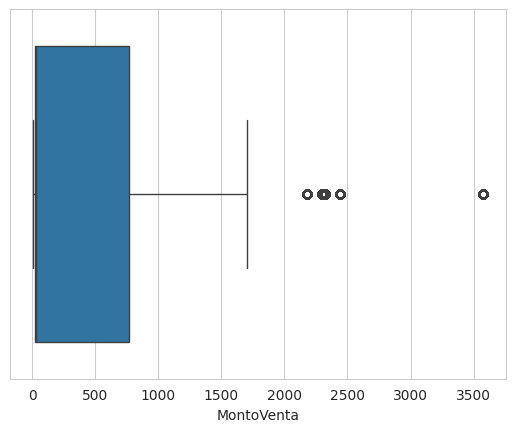

In [8]:
print('MontoVenta' + ' : ')
ax = sns.boxplot(x = data['MontoVenta'])
plt.show()

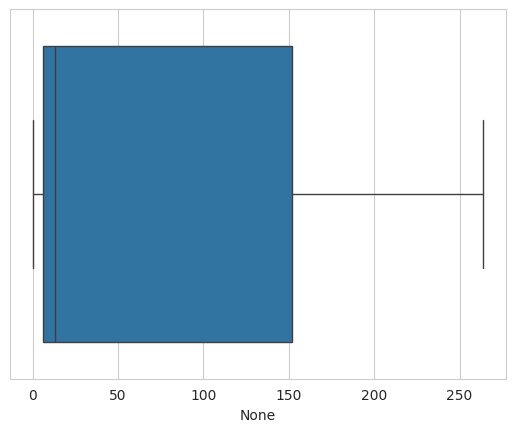

In [9]:
sns.boxplot(x=Ventas_por_semana)
plt.show()

CONSTRUCCION DE DF RFM

In [10]:
data.columns

Index(['IDCliente', 'NombreCompleto', 'FechaCompra', 'PaisTerritorioVenta',
       'RegionTerritorioVenta', 'NombreProducto', 'NombreSubcategoriaProducto',
       'NombreCategoriaProducto', 'MontoVenta'],
      dtype='object')

In [11]:
Fecha_Maxima = data['FechaCompra'].max() + dt.timedelta(days=1)
#ultima_fecha = max(df['order_date']) + dt.timedelta(days=1)

data_rfm = data.groupby('IDCliente')
metricas = {
    'FechaCompra'         : lambda x : (Fecha_Maxima - x.max()).days,
    'IDCliente'           : 'count',
    'MontoVenta'          : 'sum'
}

data_rfm = data_rfm.agg(metricas)
data_rfm.columns = ['Recencia','Frecuencia','Monto']

In [12]:
# Histograma de la Recencia
fig = px.histogram(data_rfm, x='Recencia', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Distribución de Frecuencia de Visitas de los Clientes',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

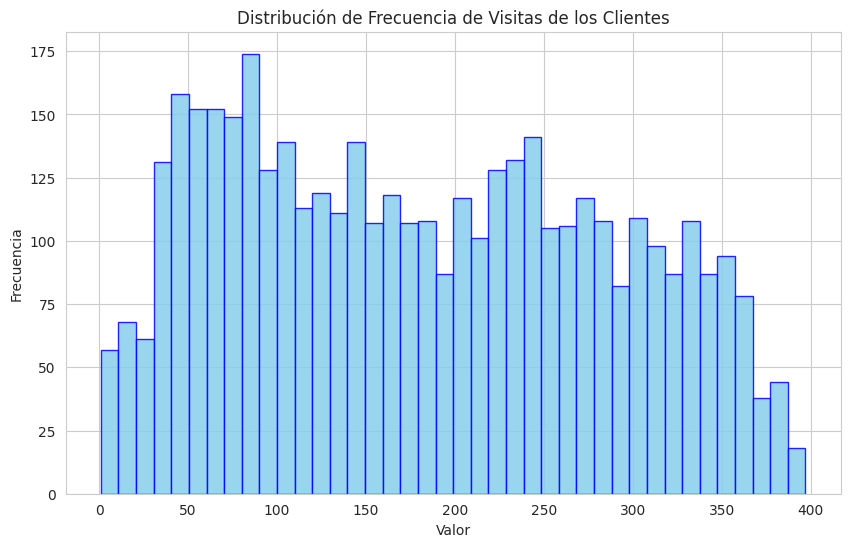

In [22]:
# Histograma de la Recencia
plt.figure(figsize=(10, 6))
plt.hist(data_rfm['Recencia'], color='skyblue', edgecolor='blue', alpha=0.85, bins = 40)
plt.title('Distribución de Frecuencia de Visitas de los Clientes')
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

plt.show()

In [14]:
# Histograma del Valor Monetario
fig = px.histogram(data_rfm, x='Monto', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Distribución Monetaria de los Clientes',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

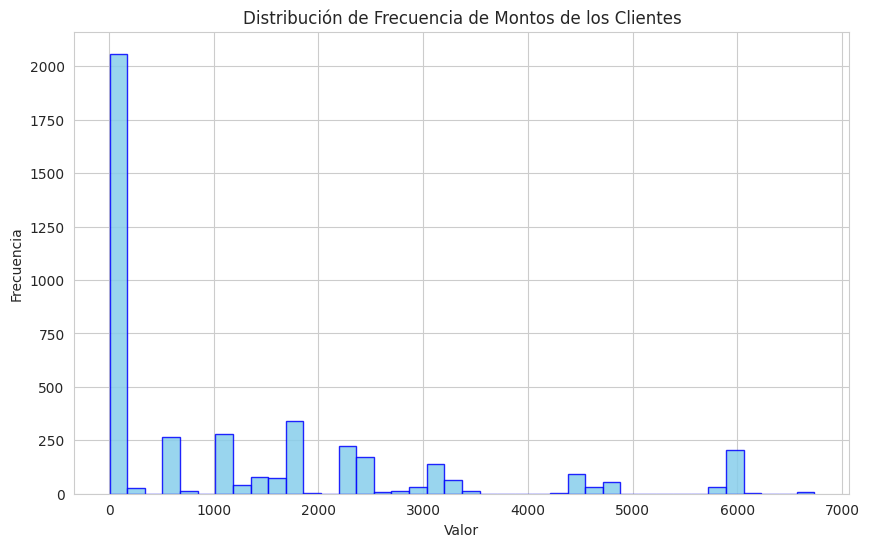

In [21]:
# Histograma de la MONTO
plt.figure(figsize=(10, 6))
plt.hist(data_rfm['Monto'], color='skyblue', edgecolor='blue', alpha=0.85, bins = 40)
plt.title('Distribución de Frecuencia de Montos de los Clientes')
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

plt.show()

In [16]:
# Asignar puntuaciones RFM
def rfm_scores_improved(dataframe):
    """
    Asigna puntuaciones RFM a los clientes incluyendo la Frecuencia en el análisis:
    - Recencia_score: 5 - más reciente, 1 - menos reciente
    - Frecuencia_score: 1 - menos frecuente, 5 - más frecuente
    - ValorMonetario_score: 1 - menos valioso, 5 - más valioso
    - RFM_SCORE: Suma de Recencia_score, Frecuencia_score y ValorMonetario_score
    """
    dataframe["Recencia_score"]       = pd.qcut(dataframe["Recencia"],                        5, labels=[5, 4, 3, 2, 1])
    dataframe["Frecuencia_score"]     = pd.qcut(dataframe["Frecuencia"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    dataframe["ValorMonetario_score"] = pd.qcut(dataframe["Monto"],                  5, labels=[1, 2, 3, 4, 5])

    # Sumamos las puntuaciones para obtener un RFM_SCORE mejorado
    dataframe["RFM_SCORE"] = dataframe["Recencia_score"].astype(str) + dataframe["Frecuencia_score"].astype(str) + dataframe["ValorMonetario_score"].astype(str)

    return dataframe


rfm_scores_improved(data_rfm)

,Recencia,Frecuencia,Monto,Recencia_score,Frecuencia_score,ValorMonetario_score,RFM_SCORE
IDCliente,,,,,,,
11012,106,4,78.97,4,5,3,453
11013,8,5,113.96,5,5,3,553
11014,274,5,113.96,2,5,3,253
11015,376,3,2500.97,1,4,5,145
11016,354,2,2329.99,1,2,4,124
...,...,...,...,...,...,...,...
22152,53,3,1205.47,5,5,4,554
22153,246,2,548.98,2,4,3,243
22157,113,1,29.99,4,2,1,421


In [17]:
data_rfm

,Recencia,Frecuencia,Monto,Recencia_score,Frecuencia_score,ValorMonetario_score,RFM_SCORE
IDCliente,,,,,,,
11012,106,4,78.97,4,5,3,453
11013,8,5,113.96,5,5,3,553
11014,274,5,113.96,2,5,3,253
11015,376,3,2500.97,1,4,5,145
11016,354,2,2329.99,1,2,4,124
...,...,...,...,...,...,...,...
22152,53,3,1205.47,5,5,4,554
22153,246,2,548.98,2,4,3,243
22157,113,1,29.99,4,2,1,421


In [18]:
# Mapeo de segmentos RFM
mapa_segmentos = {
    r'[4-5][4-5][4-5]': 'Campeones',            # Muy recientes, muy frecuentes, muy altos gastos
    r'[2-3][4-5][4-5]': 'Leales',               # Menos recientes, pero frecuentes y altos gastos
    r'[4-5][2-5][4-5]': 'Potencial Alto',       # Muy recientes, cualquier frecuencia, altos gastos
    r'[4-5][2-5][1-3]': 'Nuevos Gastadores',    # Muy recientes, cualquier frecuencia, gastos moderados
    r'[2-3][2-3][4-5]': 'Gastadores Ocasionales', # Menos recientes, frecuencia y gastos moderados
    r'[2-4][1-5][1-4]': 'Clientes con Potencial', # Cualquier recencia, cualquier frecuencia, gastos moderados
    r'[2-3][4-5][2-3]': 'Leales Económicos',    # Menos recientes, frecuentes, gastos moderados
    r'[1][4-5][4-5]': 'En Riesgo',              # No recientes, pero frecuentes y altos gastos
    r'[1-2][1-3][4-5]': 'Casi Perdidos',        # No recientes, baja frecuencia, pero altos gastos
    r'[1-2][4-5][1-3]': 'Necesitan Atención',   # No recientes, frecuentes, gastos bajos o moderados
    r'[3-4][1-3][1-3]': 'Promedio',             # Recientes y frecuencia moderada, gastos bajos
    r'[1-3][1-3][1-3]': 'Sin Actividad',        # No recientes, no frecuentes, bajos gastos
    r'[1-3][1-3][1-2]': 'Dormidos',             # poca participacion.
    r'[4-5][1][1-5]': 'Clientes Nuevos',        # Muy recientes, no frecuentes, cualquier gasto
    r'[1][1][1]': 'Perdidos',                   # No recientes, no frecuentes, gastos muy bajos
}


data_rfm['segmento'] = data_rfm['RFM_SCORE'].replace(mapa_segmentos, regex = True)



In [19]:
data_rfm

,Recencia,Frecuencia,Monto,Recencia_score,Frecuencia_score,ValorMonetario_score,RFM_SCORE,segmento
IDCliente,,,,,,,,
11012,106,4,78.97,4,5,3,453,Nuevos Gastadores
11013,8,5,113.96,5,5,3,553,Nuevos Gastadores
11014,274,5,113.96,2,5,3,253,Clientes con Potencial
11015,376,3,2500.97,1,4,5,145,En Riesgo
11016,354,2,2329.99,1,2,4,124,Casi Perdidos
...,...,...,...,...,...,...,...,...
22152,53,3,1205.47,5,5,4,554,Campeones
22153,246,2,548.98,2,4,3,243,Clientes con Potencial
22157,113,1,29.99,4,2,1,421,Nuevos Gastadores


<Figure size 2000x1500 with 0 Axes>

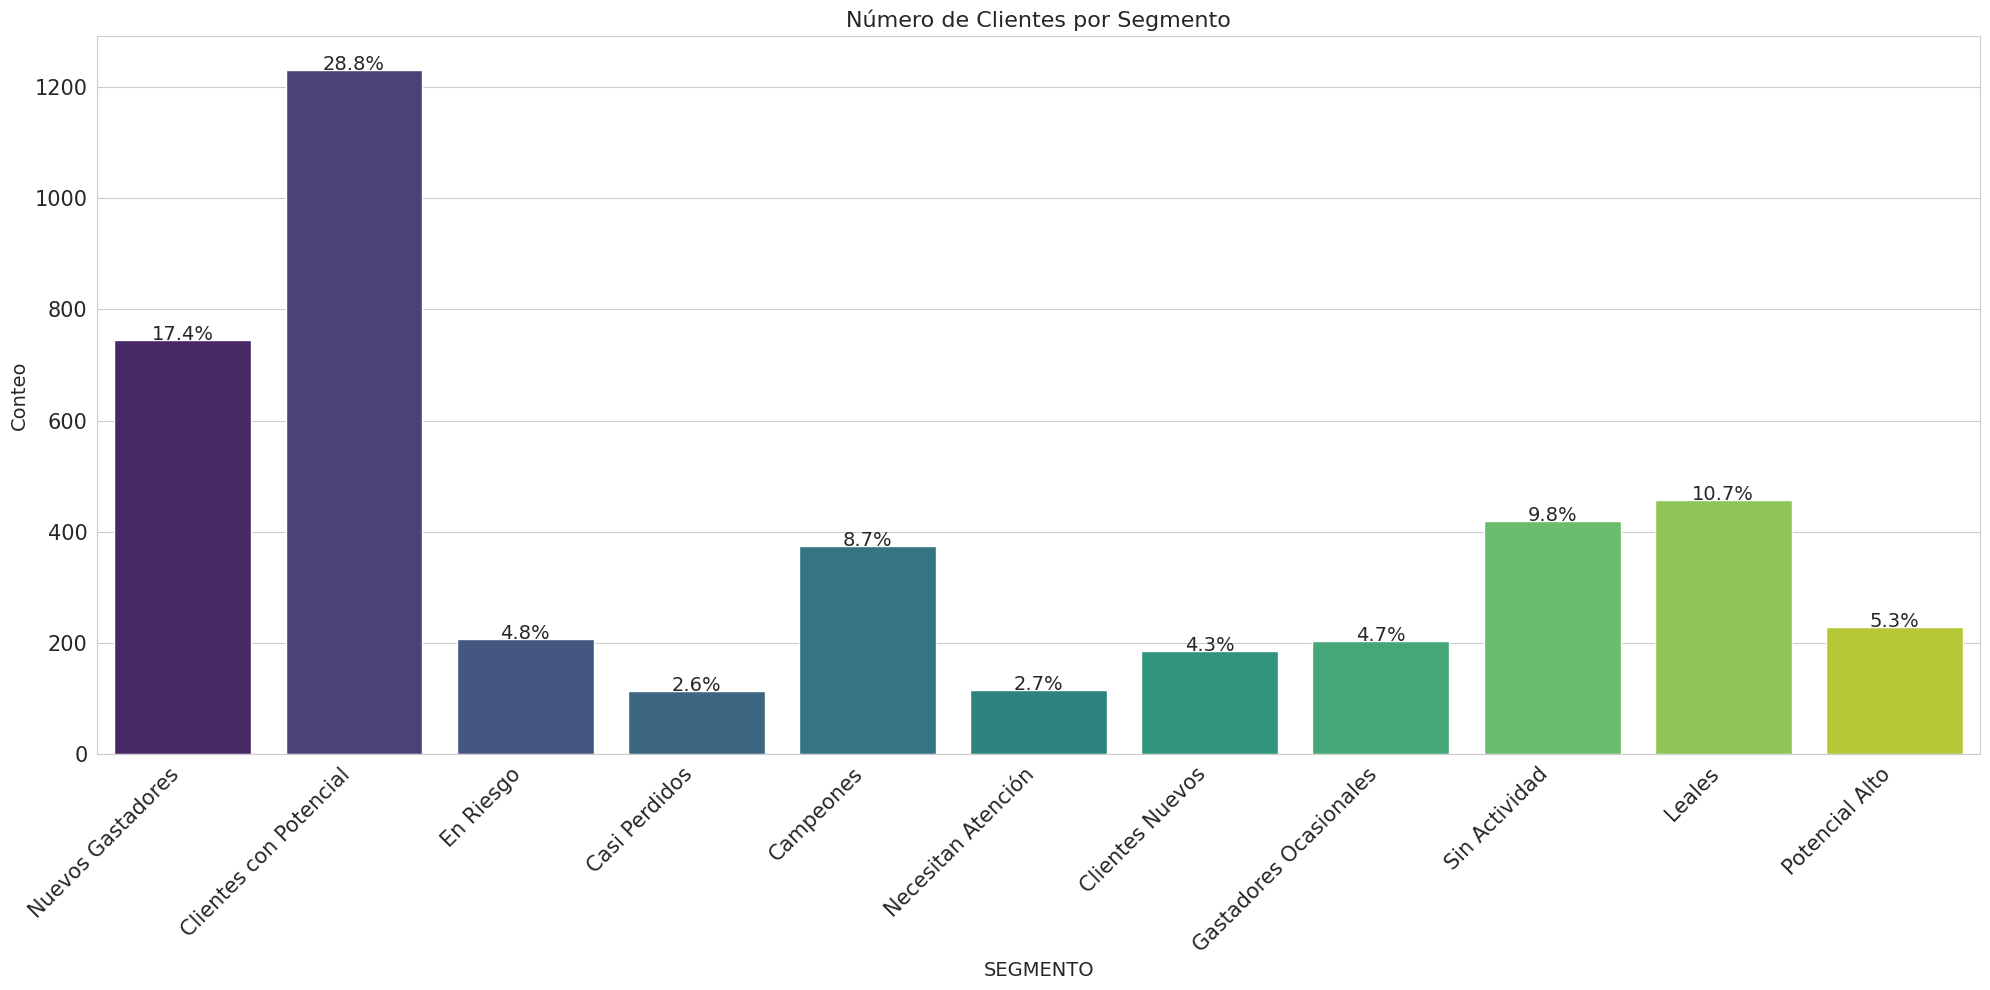

In [34]:
# Gráfico de barras de segmentos RFM CONTEO
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=data_rfm, x='segmento',  ax=ax, palette='viridis')
total = len(data_rfm.segmento)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height()
    ax.annotate(percentage, (x, y), ha='center', size=14)  # Centrar la anotación

plt.title('Número de Clientes por Segmento', size=16)
plt.ylabel('Conteo', size=14)
plt.xlabel('SEGMENTO', fontsize=14)
plt.xticks(rotation=45, ha='right', size=15)  # Rotar las etiquetas del eje x
plt.yticks(size=15)
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama para que la subtrama se ajuste al área de la figura

<Figure size 2000x1500 with 0 Axes>

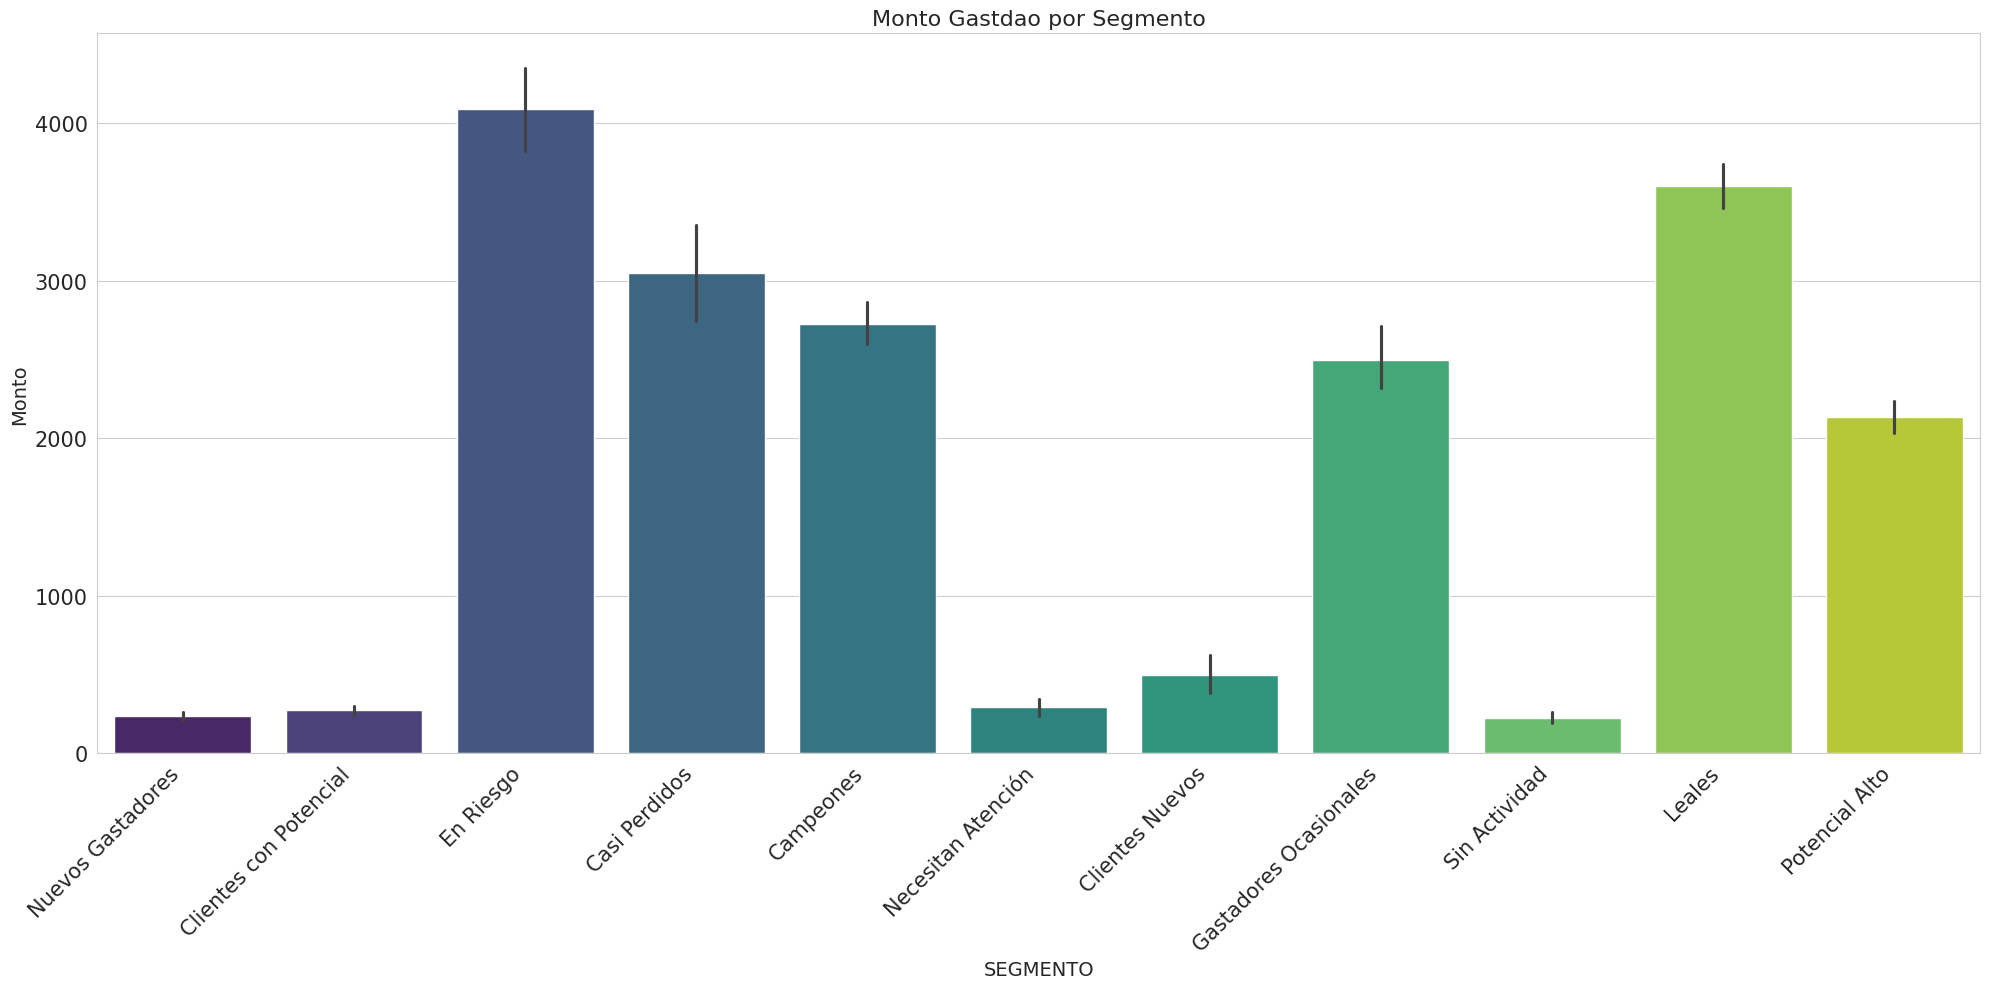

In [51]:
# Gráfico de barras de segmentos RFM MONTO
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data_rfm, x='segmento', y = 'Monto',  ax=ax, palette='viridis')
total = data_rfm.Monto.sum()
#for patch in ax.patches:
#    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
#    x = patch.get_x() + patch.get_width() / 2
#    y = patch.get_y() + patch.get_height()
#    ax.annotate(percentage, (x, y), ha='center', size=20)  # Centrar la anotación

plt.title('Monto Gastdao por Segmento', size=16)
plt.ylabel('Monto', size=14)
plt.xlabel('SEGMENTO', fontsize=14)
plt.xticks(rotation=45, ha='right', size=15)  # Rotar las etiquetas del eje x
plt.yticks(size=15)
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama para que la subtrama se ajuste al área de la figura

In [49]:
data_rfm[data_rfm['segmento'] == 'Clientes con Potencial']['Monto'].sum()

335007.22

In [50]:
data_rfm[data_rfm['segmento'] == 'Potencial Alto']['Monto'].sum()

486295.91170000006

In [42]:
# Tabla de clientes en el segmento "Clientes con Potencial"
segmento = "Clientes con Potencial"
a = data_rfm[data_rfm["segmento"] == segmento].sort_values(by='Monto', ascending=False).head()
colorscale = "inferno"
table = ff.create_table(a, colorscale=colorscale)
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 12
iplot(table)

In [44]:
# Treemap de segmentos RFM
x = data_rfm.segmento.value_counts()
fig = px.treemap(x, path=[x.index], values=x)
fig.update_layout(title_text='Distribución de los Segmentos RFM', title_x=0.5, title_font=dict(size=20))
fig.update_traces(textinfo="label+value+percent root")
fig.show()